In [61]:
import tellurium as te
import numpy as np
import matplotlib.pyplot as plt
import lmfit
import numpy as np
from ipywidgets import *
from IPython.display import display
from IPython.display import clear_output
from ipywidgets import HBox, Label

### Inspiring Paper


Baccam, P., Beauchemin, C., Macken, C.A., Hayden, F.G., Perelson, A.S. “Kinetics of Influenza A Virus Infection in Humans.” Journal of Virology, American Society for Microbiology Journals, 1 Aug. 2006. p. 7590–7599. Copyright © 2006, American Society for Microbiology. jvi.asm.org/content/80/15/7590.short. 

## Background

The influenza A virus is something that we all have to manage year round, especially during peak times of infection that we call flu season. Despite how common it is, we still do not fully understand how the virus behaves inside of an infected individual. In order to better understand and explain how the virus behaves during an infection, mathematical models have been developed based on data from infected individuals. This module includes a simplified model as well as a slightly more complex model that considers antiviral effects due to the presence of interferon during infection. Additionally, there is a model that considers the effects of antiviral treatment alongside the effects of interferon. 

One thing to note is that the effects of the immune system are not defined explicitly. In particular, the death rate of infected cells per day is defined by the value $\delta$. This is a simplified way of describing the immune response as a whole, however there are several other factors to be considered if the entire immune system is to be described. Because of this, there is an additonal model included that attempts to better describe the effects of the immune system by considering the behavior of effector cells. Effector cells are responsible for killing infected cells, and have a rate of proliferation as well as a death rate.

Thoughout the module you will be able to adjust parameters that describe properties of the virus as well as how the body reacts to the virus. With this, you will be able to visualize how certain parameters affect the overall outlook of the infection, such as how long an infection might last as well as how quickly the infection will occur. 

# Viral Titer Data 

Data shown is the total viral titer for each patient across a span of 8 days. Viral titer is measured in TCID50, representing the amount of virus in an infected host. By using the dropdown menu, you will be able to see the toal viral load for each patient as well as the average values for all six patients. The average values are used in the parameter fitting algorithms to determine best fit parameter values for each model below.

In [62]:
def changeData(file):
    #global Data, T, TCID
    Data = np.genfromtxt(file, delimiter=',')
    T = Data[:,0] 
    TCID = Data[:,1] 
    plt.plot(T,TCID)
    plt.xlabel('Time (days)')
    plt.ylabel(r'Viral Load ($Log_{10} TCID_{50}$)')
    plt.title('IAV Viral Titers')
    plt.grid()
    plt.show()
    
interact(changeData, file = ['patient1.txt','patient2.txt','patient3.txt','patient4.txt','patient5.txt','patient6.txt','avgData.txt']);

interactive(children=(Dropdown(description='file', options=('patient1.txt', 'patient2.txt', 'patient3.txt', 'patient4.txt', 'patient5.txt', 'patient6.txt', 'avgData.txt'), value='patient1.txt'), Output()), _dom_classes=('widget-interact',))

Data provided from:

Baccam, P., Beauchemin, C., Macken, C.A., Hayden, F.G., Perelson, A.S. “Kinetics of Influenza A Virus Infection in Humans.” Journal of Virology, American Society for Microbiology Journals, 1 Aug. 2006. p. 7590–7599. Copyright © 2006, American Society for Microbiology. Table 1.  Results of nasal washes taken daily from six volunteers inoculated with 10^4.2 TCID50 of cloned wild-type influenza A/Hong Kong/123/77 (H1N1)a. jvi.asm.org/content/80/15/7590.short. 

Murphy, B. R., M. B. Rennels, R. Douglas, Jr., R. F. Betts, R. B. Couch, T. Cate, Jr., R. M. Chanock, A. P. Kendal, H. F. Maassab, S. Suwanagool, S. B. Sotman, L. A. Cisneros, W. C. Anthony, D. R. Nalin, and M. M. Levine. 1980. Evaluation of influenza A/Hong Kong/123/77 (H1N1) ts-1A2 and coldadapted recombinant viruses in seronegative adult volunteers. Infect. Immun. 29:348–355.

# Model No Delay

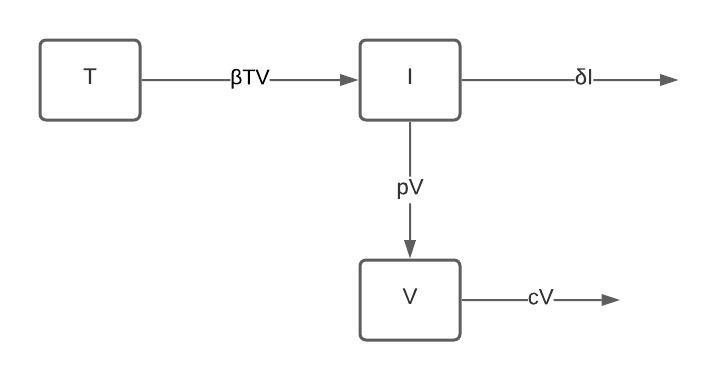

$\frac{dT}{dt}=-\beta T V$ 

$\frac{dI}{dt}=\beta T V - \delta I$

$\frac{dV}{dt}=p I - c V$ 

This model describes a target cell limited model, where $T$ represents the amount of uninfected target cells, $I$ represents the amount of infected target cells, and $V$ represents the viral titer in $TCID_{50}$/mL. Target cells become infected at a rate $\beta T V$, and infected cells die at a rate $\delta$. $\beta$ represents the probability of one virion infecting one cell. $\delta$ represents the rate at which infected cells die per day. Infected cells produce virions at rate $p$ virions per day per cell. $c$ represents the natural decay rate of free virus per day.

## Try:

1. Start by adjusting the value of $p$, the viral production by infected cells, to 0.1. What do you notice? Lower the value of p to 0. For different values of $p$, notice the behavior of the viral load curve. Notice the maximum value that the peak reaches, when the peak occurs, as well as when the value reaches 0. You should see that as the value of p is decreased, the maximum value of the viral load curve decreases, and it takes longer for this peak to be reached.


2. Now, increase the value of $\beta$. Notice how the viral load curve reaches its peak much more rapidly as beta increases. An increase in the infectivity of the virus results in a more rapid spread of infection. Notice that the peak of infection is reached earlier and earlier as infectivity ($\beta$) is increased.


3. Set the value of $\delta$ to 10. Now change the value to 1. How does the viral load curve change? You should notice that the amount of virus remaining by day 8 varies greatly. By decreasing the death rate of infected cells, you are allowing infected cells to remain in the system for longer, which leads to an increase in viral load. The opposite is true by increasing the death rate.


4. Now adjust the viral clearance rate $c$. Set the value to 10. How does this result differ from the initial value of 4? Increasing the clearance rate of free virus not only decreases the viral load, but also results in a slower infection as there are less virions available to infect target cells. 

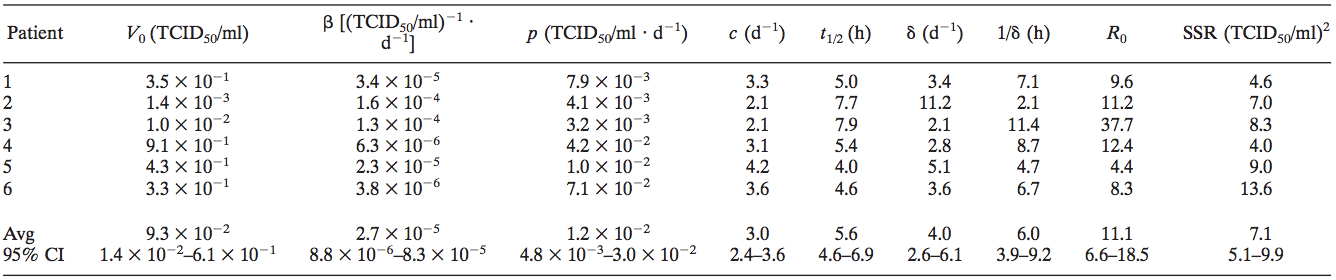

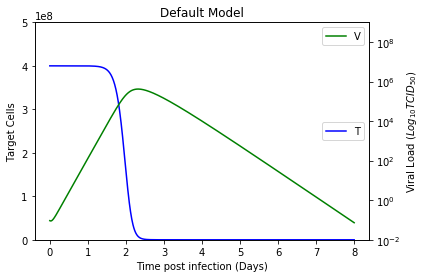

Button(description='Default Values', style=ButtonStyle())

interactive(children=(FloatSlider(value=0.012, continuous_update=False, description='Infected cell viral production', layout=Layout(width='500px'), max=0.12, readout_format='.2e', step=0.02, style=SliderStyle(description_width='initial')), FloatSlider(value=2.7e-05, continuous_update=False, description='Infectivity of virus', layout=Layout(width='500px'), max=0.0027, readout_format='.2e', step=2.7e-05, style=SliderStyle(description_width='initial')), FloatSlider(value=4.0, continuous_update=False, description='Infected cell death rate', layout=Layout(width='500px'), max=15.0, readout_format='.2e', step=0.5, style=SliderStyle(description_width='initial')), FloatSlider(value=3.0, continuous_update=False, description='Virus clearance rate', layout=Layout(width='500px'), max=15.0, readout_format='.2e', step=0.5, style=SliderStyle(description_width='initial')), Output()), _dom_classes=('widget-interact',))

In [63]:
model_noDelay = '''

    //Equations
    E1: T -> I ; beta*T0*(V/T0)*T ; // beta*T*V
    E2: I -> ; delta*I ;
    E3: -> V ; p*I ;
    E4: V -> ; c*V ;
    
    //Parameters
    
    p = 1.2E-2 ;      //  (TCID50/ml)/d
    beta = 2.7E-5 ;   //  1/((TCID50/ml)*d)
    delta = 4 ;       //  1/d
    c = 3 ;           //  1/d
    
    //Initial Conditions
    T0 = 4E8 ;
    T = T0 ;
    V0 = 9.3E-2 ;
    V = V0 ;
    I0 = 0 ;
    I = I0 ;
    
    R0 := (p*beta*T0)/(c*delta) ;
    

'''
m = te.loada(model_noDelay)

s = m.simulate(0,8,1000, ['Time', 'T','V'])
fig, ax1 = plt.subplots()

ax1.set_xlabel('Time post infection (Days)')
ax1.set_ylabel('Target Cells')
plt.ylim(0,5E8)
plt.plot(s['time'],s['T'],label='T',color='b')
plt.legend(loc='center right')
ax2 = ax1.twinx()
ax2.set_ylabel('Viral Load ($Log_{10} TCID_{50}$)')
plt.plot(s['time'],s['V'],label='V',color='g')
plt.legend(loc='upper right')

plt.yscale('log')
plt.ylim(10**-2,10**9)
plt.title('Default Model')
plt.show()

button = widgets.Button(description="Default Values")
display(button)

def on_button_clicked(b):
    
    clear_output(wait=True)
    
    m = te.loada(model_noDelay)

    s = m.simulate(0,8,1000, ['Time', 'T','V'])
    fig, ax1 = plt.subplots()

    ax1.set_xlabel('Time post infection (Days)')
    ax1.set_ylabel('Target Cells')
    plt.ylim(0,5E8)
    plt.plot(s['time'],s['T'],label='T',color='b')
    plt.legend(loc='center right')
    ax2 = ax1.twinx()
    ax2.set_ylabel('Viral Load ($Log_{10} TCID_{50}$)')
    plt.plot(s['time'],s['V'],label='V',color='g')
    plt.legend(loc='upper right')

    plt.yscale('log')
    plt.ylim(10**-2,10**9)
    plt.title('Default Model')
    plt.show()
    button = widgets.Button(description="Default Values")
    display(button)
    style = {'description_width': 'initial'}

    layout=widgets.Layout(width='500px')
    
    p1 = FloatSlider(min=0.0,max=0.46,step=0.02,value=0.046,description = 'Infected cell viral production per day',continuous_update=False,readout_format='.2e',style = style,layout=layout)
    β1 = FloatSlider(min=0.0,max=0.0027,step=0.000027,value=0.000027,description = 'Infectivity of virus',continuous_update=False,readout_format='.2e',style = style,layout=layout)
    δ1 = FloatSlider(min=0.0,max=15,step=0.5,value=4,description = 'Infected cell death rate',continuous_update=False,readout_format='.2e',style = style,layout=layout)
    c1 = FloatSlider(min=0.0,max=15,step=0.5,value=3,description = 'Virus clearance rate',continuous_update=False,readout_format='.2e',style = style,layout=layout)

    interact(replot1, p = p1 ,β= β1, δ= δ1,c=c1);
    button.on_click(on_button_clicked)
    
button.on_click(on_button_clicked)

def replot1(p,β,δ,c):
    
    m = te.loada(model_noDelay)
    m.p = p
    m.beta = β
    m.delta = δ
    m.c = c
    
    s = m.simulate(0,8,1000, ['Time', 'T','V'])
    fig, ax1 = plt.subplots()

    ax1.set_xlabel('Time post infection (Days)')
    ax1.set_ylabel('Target Cells')
    plt.ylim(0,5E8)
    plt.plot(s['time'],s['T'],label='T',color='b')
    plt.legend(loc='center right')
    ax2 = ax1.twinx()
    ax2.set_ylabel('Viral Load ($Log_{10} TCID_{50}$)')
    plt.plot(s['time'],s['V'],label='V',color='g')
    plt.legend(loc='upper right')

    plt.yscale('log')
    plt.ylim(10**-2,10**9)
    plt.show() 
    
    print('Infected cell viral production (p): ',m.p,'(TCID50/ml)/d')
    print('Infectivity of virus (β):           ',m.beta,'1/((TCID50/ml)*d)')
    print('Infected cell death rate (δ):       ',m.delta,'1/d')
    print('Virus clearance rate (c):           ',m.c,'1/d')
    print("")
    print('R0:',m.R0)

style = {'description_width': 'initial'}
layout=widgets.Layout(width='500px')

p1 = FloatSlider(min=0.0,max=0.12,step=0.02,value=0.012,description = 'Infected cell viral production',continuous_update=False,readout_format='.2e',style = style,layout=layout)
β1 = FloatSlider(min=0.0,max=0.0027,step=0.000027,value=0.000027,description = 'Infectivity of virus',continuous_update=False,readout_format='.2e',style = style,layout=layout)
δ1 = FloatSlider(min=0.0,max=15,step=0.5,value=4,description = 'Infected cell death rate',continuous_update=False,readout_format='.2e',style = style,layout=layout)
c1 = FloatSlider(min=0.0,max=15,step=0.5,value=3,description = 'Virus clearance rate',continuous_update=False,readout_format='.2e',style = style,layout=layout)

interact(replot1, p = p1 ,β= β1, δ= δ1,c=c1);



Data for this model provided from:

Baccam, P., Beauchemin, C., Macken, C.A., Hayden, F.G., Perelson, A.S. “Kinetics of Influenza A Virus Infection in Humans.” Journal of Virology, American Society for Microbiology Journals, 1 Aug. 2006. p. 7590–7599. Copyright © 2006, American Society for Microbiology. Table 2. Patient-specific best-fit parameter values for the target cell-limited model with no delay. jvi.asm.org/content/80/15/7590.short. 

# Adjusting $R_0$

For the simplified model shown above, the basic reproductive number $R_0$ is calculated by

$R_0$ = $\frac{p \beta T_0}{c \delta}$

(Baccam et al., 2006)

and describes the average number of cells that will result from one infected cell. A value of $R_0$ less than 1 will result in the infection dying out quickly, and any number greater than 1 will result in a productive infection. The average value of $R_0$ for the given data is 11.1 (Baccam et al., 2006), which would suggest that the virus spreads quickly, as shown in the figure below.

## Try:

1. Adjust the value of R0 to 80. What do you observe? Take note of the maximum value reached for the viral load curve, as well as when the peak is reached.


2. Now, set the value of R0 to 0.5. How do these results differ?


3. The value of $R_0$ is also calculated in the previously shown model. Experiment with changing the parameters and notice how the value of R0 changes. Which parameters seem to have the largest influence?

Notice how values of $R_0$ between 0 and 2 result in noticeably different shapes of curves. In contrast, notice how the values of $R_0$ greater than 3 result in curves that generally have the same shape. For the data provided for this model, values of $R_0$ greater than 50 show very similar results. This is explained by the infection spreading so rapidly that the peak of infection is reached around day 1, regardless of the value of $R_0$ (  > 50). 

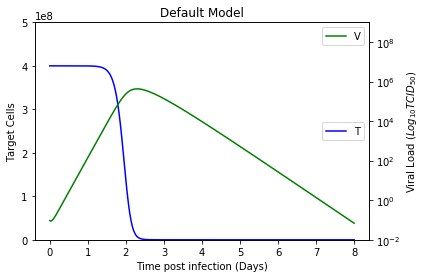

Button(description='Default Values', style=ButtonStyle())

interactive(children=(FloatSlider(value=11.0, continuous_update=False, description='R0', step=0.5), FloatSlider(value=8.0, continuous_update=False, description='days', max=25.0, min=3.0, step=1.0), Output()), _dom_classes=('widget-interact',))

In [64]:
model_noDelay1 = '''

    //Equations
    E1: T -> I ; beta*T0*(V/T0)*T ;
    E2: I -> ; delta*I ;
    E3: -> V ; p*I ;
    E4: V -> ; c*V ;
    
    //Parameters
    
    p = 1.2E-2 ;
    beta = 2.7E-5 ;
    delta = 4 ;
    c = 3 ;
    
    //Initial Conditions
    T0 = 4E8 ;
    T = T0 ;
    V0 = 9.3E-2 ;
    V = V0 ;
    I0 = 0 ;
    I = I0 ;
    
    R0 = 11 ;
    
    p := (c*delta*R0)/(T0*beta) ;

'''    
m = te.loada(model_noDelay1)
    
s = m.simulate(0,8,1000, ['Time', 'T','V'])
fig, ax1 = plt.subplots()

ax1.set_xlabel('Time post infection (Days)')
ax1.set_ylabel('Target Cells')
plt.ylim(0,5E8)
plt.plot(s['time'],s['T'],label='T',color='b')
plt.legend(loc='center right')
ax2 = ax1.twinx()
ax2.set_ylabel('Viral Load ($Log_{10} TCID_{50}$)')
plt.plot(s['time'],s['V'],label='V',color='g')
plt.legend(loc='upper right')

plt.yscale('log')
plt.ylim(10**-2,10**9)
plt.title('Default Model')
plt.show() 

button = widgets.Button(description="Default Values")
display(button)

def on_button_clicked(b):
    
    clear_output(wait=True)
    m = te.loada(model_noDelay1)
    
    s = m.simulate(0,8,1000, ['Time', 'T','V'])
    fig, ax1 = plt.subplots()

    ax1.set_xlabel('Time post infection (Days)')
    ax1.set_ylabel('Target Cells')
    plt.ylim(0,5E8)
    plt.plot(s['time'],s['T'],label='T',color='b')
    plt.legend(loc='center right')
    ax2 = ax1.twinx()
    ax2.set_ylabel('Viral Load ($Log_{10} TCID_{50}$)')
    plt.plot(s['time'],s['V'],label='V',color='g')
    plt.legend(loc='upper right')

    plt.yscale('log')
    plt.ylim(10**-2,10**9)
    plt.title('Default Model')
    plt.show() 
    
    button = widgets.Button(description="Default Values")
    display(button)
    interact(replot1_1,R0=FloatSlider(min=0.0,max=100,step=0.5,value=11,continuous_update=False),days = FloatSlider(min=3,max=25,step=1,value=8,continuous_update=False));
   
    button.on_click(on_button_clicked)
    
button.on_click(on_button_clicked)

def replot1_1(R0,days):
    
    m = te.loada(model_noDelay1)
    m.R0 = R0
    d = days
    
    s = m.simulate(0,d,1000, ['Time', 'T','V'])
    fig, ax1 = plt.subplots()

    ax1.set_xlabel('Time post infection (Days)')
    ax1.set_ylabel('Target Cells')
    plt.ylim(0,5E8)
    plt.plot(s['time'],s['T'],label='T',color='b')
    plt.legend(loc='center right')
    ax2 = ax1.twinx()
    ax2.set_ylabel('Viral Load ($Log_{10} TCID_{50}$)')
    plt.plot(s['time'],s['V'],label='V',color='g')
    plt.legend(loc='upper right')

    plt.yscale('log')
    plt.ylim(10**-2,10**9)
    plt.show() 
    
    print('R0:',m.R0)

interact(replot1_1,R0=FloatSlider(min=0.0,max=100,step=0.5,value=11,continuous_update=False),days = FloatSlider(min=3,max=25,step=1,value=8,continuous_update=False));


# Individual Patient Data

Below are the patient-specific models for each patient using the data provided. (cited below)

In [65]:
def patientModel(file):
    Data = np.genfromtxt(file, delimiter=',')
    m = te.loada(model_noDelay)
    
    m.p = Data[0]
    m.beta = Data[1]
    m.delta = Data[2]
    m.c = Data[3]
    m.V = Data[4] #initial patient V0
    s = m.simulate(0,8,1000, ['Time', 'T', 'V'])
    fig, ax1 = plt.subplots()

    ax1.set_xlabel('Time post infection (Days)')
    ax1.set_ylabel('Target Cells')
    plt.ylim(0,5E8)
    plt.plot(s['time'],s['T'],label='T',color='b')
    plt.legend(loc='center right')

    ax2 = ax1.twinx()
    ax2.set_ylabel('Viral Load ($Log_{10} TCID_{50}$)')
    plt.plot(s['time'],s['V'],label='V',color='g')
    plt.legend(loc='lower right')

    plt.yscale('log')
    plt.ylim(10**-2,10**9)
    plt.show() 

interact(patientModel, file = ['pat1NoDelay.txt','pat2NoDelay.txt','pat3NoDelay.txt','pat4NoDelay.txt','pat5NoDelay.txt','pat6NoDelay.txt']);

interactive(children=(Dropdown(description='file', options=('pat1NoDelay.txt', 'pat2NoDelay.txt', 'pat3NoDelay.txt', 'pat4NoDelay.txt', 'pat5NoDelay.txt', 'pat6NoDelay.txt'), value='pat1NoDelay.txt'), Output()), _dom_classes=('widget-interact',))

Data for each patient model provided from: 

Baccam, P., Beauchemin, C., Macken, C.A., Hayden, F.G., Perelson, A.S. “Kinetics of Influenza A Virus Infection in Humans.” Journal of Virology, American Society for Microbiology Journals, 1 Aug. 2006. p. 7590–7599. Copyright © 2006, American Society for Microbiology. Table 2. Patient-specific best-fit parameter values for the target cell-limited model with no delay. jvi.asm.org/content/80/15/7590.short. 

# Fitting Parameters (model with no delay)

The goal of fitting the parameters to the provided data is to determine best fit value for each parameter in the model without delay. The parameters are fit to the average data set.

In [66]:
Data = np.genfromtxt('avgData.txt', delimiter=',')
T = Data[:,0] 
TCID = Data[:,1] 

def cost_fun(p):
    m = te.loada(model_noDelay)
    pp = p.valuesdict()
    for i in range(nParameters):
        m.model[toFit[i]] = pp[toFit[i]]
    try:
        s = m.simulate(0, 8, 100, ['time','V'])
        diff = 0
        for i in range(len(T)):
            j = (np.abs(s['time'] - T[i])).argmin()
            diff += (TCID[i] - np.log10(s['V'][j])) ** 2
        diff = np.sqrt(diff)
        clear_output(wait=True)
        plt.plot(T, TCID,'.',label='Data')
        plt.plot(s['time'], np.log10(s['V']),label='Model')
        plt.ylim([0,8])
        plt.legend()
        plt.title('Chi-squared Error: %.2f' % diff)
        plt.show()
    except RuntimeError:
        diff = 1E21
        print("run time error")
    return(diff)

def iter_cb(p,iter,resid):
    if resid < 1.35:
        return True

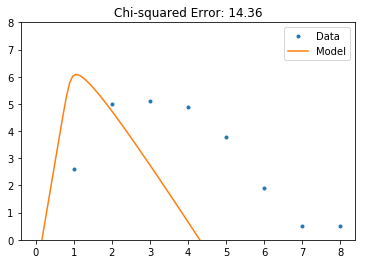

In [67]:
toFit = ['beta','p','delta', 'c']
p = 4.6E-2 ;
beta = 3.2E-5 ;
delta = 5.2 ;
c = 5.2 ;

nParameters = len(toFit)
params = lmfit.Parameters()
params.add('beta', value=beta, min=beta/10.0, max=beta*10.0)
params.add('p', value=p, min=p/10.0, max=p*10.0)
params.add('c', value=c, min=c/10.0, max=c*10.0)
params.add('delta', value=delta, min=delta/10.0, max=delta*10.0)
cost_fun(params);

Shown here is the inital guess for the fitting. The Chi-squared error is the sum of the distances that each data point is from the orange line of the model. The lower the value, the less cumulative distance the data is from this line, which represents a better fit. 

In [68]:
bu = widgets.ToggleButton(
    value=False,
    description='Fit Parameters',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Description',
    icon='check' # (FontAwesome names without the `fa-` prefix)
)


def runOptimizer(b):
    if b:
        global result
        bu2.disabled = False
        minimizer = lmfit.Minimizer(cost_fun, params,iter_cb = iter_cb)
        result = minimizer.minimize(method='nelder') # nelder, dual_annealing
        lmfit.report_fit(result.params)
    
interact(runOptimizer, b = bu);

interactive(children=(ToggleButton(value=False, description='Fit Parameters', icon='check', tooltip='Description'), Output()), _dom_classes=('widget-interact',))

# Model With Optimized Parameters

The results of this model represent the most accurate fitting of the parameters based on the data provided. 

In [69]:
bu2 = widgets.ToggleButton(
    value=False,
    description='Optimized Model',
    disabled=True,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Description',
    icon='check' # (FontAwesome names without the `fa-` prefix)
)

def fitModel(b):
    
    if b:
        m = te.loada(model_noDelay)
        for i in range(nParameters):
            m.model[toFit[i]] = result.params[toFit[i]].value

        s = m.simulate(0,8,100,['time','V','T'])

        fig, ax1 = plt.subplots()

        ax1.set_xlabel('Time post infection (Days)')
        ax1.set_ylabel('Target Cells')
        plt.plot(s['time'],s['T'],label = 'T',color='b')
        plt.legend(loc='center right')
        ax2 = ax1.twinx()
        ax2.set_ylabel('Viral Load ($Log_{10} TCID_{50}$)')
        plt.plot(s['time'],s['V'],label = 'V',color='g')
        plt.legend(loc='lower right')
        plt.yscale('log')
        plt.show() 
        
interact(fitModel, b = bu2);

interactive(children=(ToggleButton(value=False, description='Optimized Model', disabled=True, icon='check', tooltip='Description'), Output()), _dom_classes=('widget-interact',))

# Model With Delay

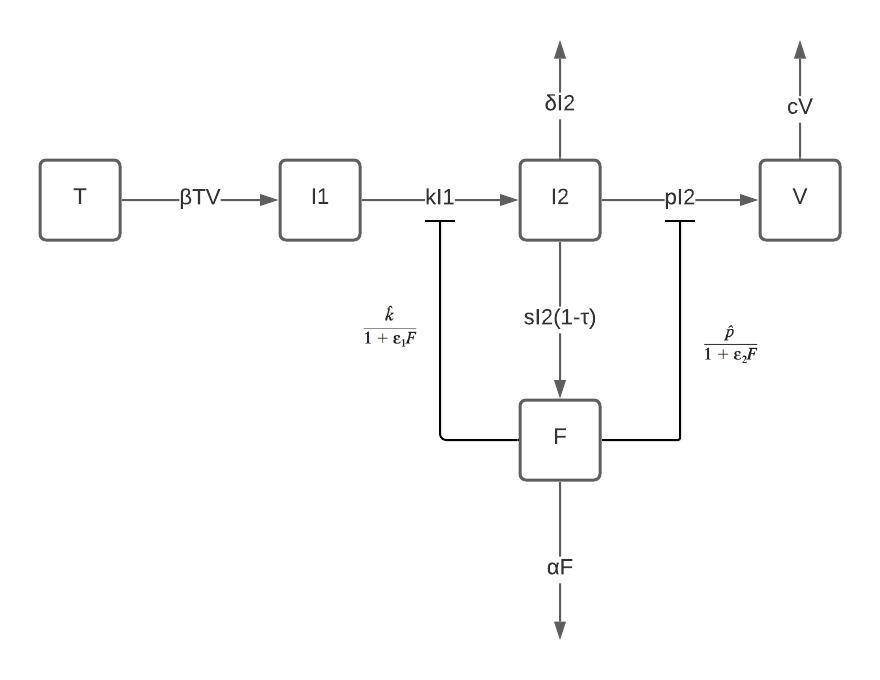


$\frac{dT}{dt}=-\beta T V$ 

$\frac{dI_1}{dt}=\beta T V - k I_1$ 

$\frac{dI_2}{dt}=k I_1 - \delta I_2$ 

$\frac{dV}{dt}=p I_2 - c V$ 

$\frac{dF}{dt}=s I_2(t - \tau) - \alpha F$ 

$k = \frac{\hat{k}}{1 + \varepsilon_1 F}$

$p = \frac{\hat{p}}{1 + \varepsilon_2 F}$


This model is an extension of the previous model, but considers a delayed viral production from infected cells. $I_1$ represents infected cells that have yet to produce virus, and $I_2$ represents infected cells that contribute to viral production. The parameter $k$ represents the rate of transition from $I_1$ state to $I_2$ state. $F$ represents the amount of interferon. The rate of interferon degredation is represented by the parameter $\alpha$. Due to the presence of interferon, the rate of production of virions by infected cells ($p$) is affected, and is represented as $\hat{p}$. Likewise, the rate of transition from $I_1$ to $I_2$ ($k$) is influenced by interferon presence and is represented by $\hat{k}$. The parameter $\tau$ represents the delay (in days) of interferon production after $I_2$ cells begin producing virions. The parameter $s$ is held at a constant value of 1 and represents the rate of interferon production from infected $I_2$ cells per day. 

It should be noted that interferon is not only produced from infected $I_2$ cells, but also "from monocytes, macrophages, and plasmacytoid dendritic cells" (Baccam et al., 2006). For this model, it is assumed that interferon is only produced from $I_2$ cells.


## Try:

1. Increase the value of $p$ to be 0.01. What do you notice about the final value of target cells (blue line)? What do you notice about the viral load curve? You should see that the final amount of target cells does not reach 0 and that the viral load also reaches a lower maximum value. This is due to the decrease in virion production, as well as the inhibiting effects of interferon. 


2. Increase the value of $\beta$. Notice how the viral load curve reaches its peak much more rapidly as beta increases. An increase in the infectivity of the virus results in a more rapid spread of infection. Notice that the peak of infection is reached earlier and earlier as infectivity ($\beta$) is increased.


3. Change the value of $\delta$ from 0 to 20. Pay attention to how long it takes for all target cells to become infected (blue line reaches 0). Also notice the final values for both the viral load curve as well as the interferon curve. When the infected cell death rate drops to 0, infected cells acccumulate over time resulting in an overall increase in viral load as well as interferon levels.  


4. Set the value of the viral clearance rate ($c$) to 16. How does this result differ from the initial value of 5.2? As seen previously, increasing the clearance rate of free virus not only decreases the viral load, but also results in a slower infection as there are less virions available to infect target cells. Pay attention to how interferon curve is affected by this change, as a slower progression of infection results in decreased interferon production from infected $I_2$ cells.


5. Change the rate of transition from $I_1$ to $I_2$ ($k$) to 1. Now change the value to 15. How do these results differ? You should see that with a decreased transition rate, the time it takes for all target cells to become infected increases and the viral load and interferon levels reach lower values. Because $I_2$ cells are the only contributor to the viral load, when the amount of $I_2$ cells decreases, the amount of virions being produced decreases as well as interferon. The opposite is true for an increased transition rate. 


6. The value of $\alpha$ represents the rate at which interferon is degraded or used up by cellular receprtors. Try increasing the value of $\alpha$ to 400, then lower it to 10. How does this affect the amount of interferon? You should notice that the behavior of the curve is similar to that of the viral load curve. By increasing $\alpha$, you should see a decrease in the overall amount of interferon, and an increased amount when $\alpha$ is decreased 


7. Change the value of $\tau$ between 0 and 1. How does this affect the graph? Increasing $\tau$ should result in an increase in interferon production, and a decrease in tau should result in a decrease in interferon production. Note: due to the setup of the model, when tau is 0, there is no interferon production. 



### Now try changing parameters in pairs

##### Some to try:

1. $p$ and $c$
2. $p$ and $\delta$
3. $k$ and $\alpha$


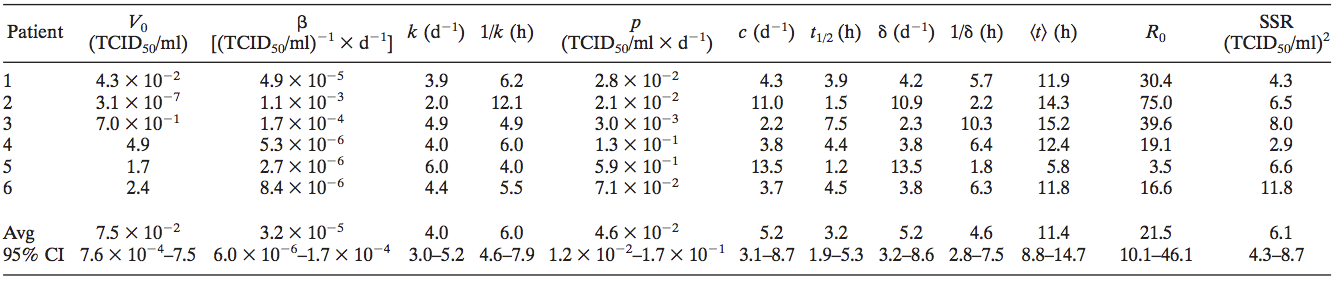

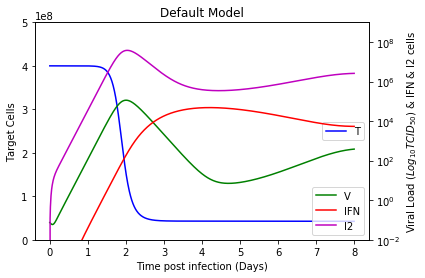

Button(description='Default Values', style=ButtonStyle())

interactive(children=(FloatSlider(value=0.046, continuous_update=False, description='Infected cell viral production', layout=Layout(width='500px'), max=0.46, readout_format='.2e', step=0.02, style=SliderStyle(description_width='initial')), FloatSlider(value=3.2e-05, continuous_update=False, description='Infectivity of virus', layout=Layout(width='500px'), max=0.0032, readout_format='.2e', step=3.2e-05, style=SliderStyle(description_width='initial')), FloatSlider(value=5.2, continuous_update=False, description='Infected cell death rate', layout=Layout(width='500px'), max=20.0, readout_format='.2e', step=0.2, style=SliderStyle(description_width='initial')), FloatSlider(value=5.2, continuous_update=False, description='Virus clearance rate', layout=Layout(width='500px'), max=20.0, readout_format='.2e', step=0.2, style=SliderStyle(description_width='initial')), FloatSlider(value=5.2, continuous_update=False, description='Delay of IFN response', layout=Layout(width='500px'), max=15.0, readout_format='.2e', step=0.2, style=SliderStyle(description_width='initial')), FloatSlider(value=100.0, continuous_update=False, description='Transition rate from I1 to I2', layout=Layout(width='500px'), max=400.0, readout_format='.2e', step=10.0, style=SliderStyle(description_width='initial')), FloatSlider(value=0.5, continuous_update=False, description='Rate of IFN degredation', layout=Layout(width='500px'), max=2.0, min=0.1, readout_format='.2e', style=SliderStyle(description_width='initial')), Output()), _dom_classes=('widget-interact',))

In [70]:
model_Delay = '''

    //Equations
    E1: T -> I1 ; beta*T0*(V/T0)*T ;
    E2: I1 -> I2 ; k*I1 ;
    E3: I2 -> ; delta*I2 ;
    E4: -> V ; p*I2 ;
    E5: V -> ; c*V ;
    E6: -> F; s*I2 ;
    E7: F -> ; alpha*F ;
    E8: -> F0 ; F ;
    
    E9: F0 -> F1 ; (1/tau)*F0 ;
    E10: F1 -> F2 ; (1/tau)*F1 ;
    E11: F2 -> F3 ; (1/tau)*F2 ;
    E12: F3 -> F4 ; (1/tau)*F3 ;
    E13: F4 -> ; F4*(1/tau) ;
    
    k := (k_h)/(1+ep1*F4) ;
    p := (p_h)/(1+ep2*F4) ;
    
    //Parameters
    k_h = 4 ;
    //k := k_h;
    p_h = 4.6E-2 ;
    //p :=p_h;
    tau = 0.5 ; 
    beta = 3.2E-5 ;
    delta = 5.2 ;
    c = 5.2 ;
    s = 1 ;
    alpha = 100 ; //unknown
    ep1 = 0.01 ; //unknown
    ep2 = 0.01 ; //unknown
    
    //Initial Conditions
    T0 = 4E8 ;
    T = T0 ;
    V0 = 7.5E-2 ;
    V = V0 ;
    I10 = 0 ;
    I1 = I10 ;
    I20 = 0 ;
    I2 = I20 ;


'''
m = te.loada(model_Delay)

s = m.simulate(0,8,1000, ['time', 'T','V','F4','I2'])
fig, ax1 = plt.subplots()

ax1.set_xlabel('Time post infection (Days)')
ax1.set_ylabel('Target Cells')
plt.ylim(0,5E8)
plt.plot(s['time'],s['T'],label='T',color = 'b')
plt.legend(loc='center right')

ax2 = ax1.twinx()
ax2.set_ylabel('Viral Load ($Log_{10} TCID_{50}$) & IFN & I2 cells')
plt.plot(s['time'],s['V'],label='V',color = 'g')
plt.plot(s['time'],s['F4'],label='IFN',color = 'r')
plt.plot(s['time'],s['I2'],label='I2',color='m')

plt.legend(loc='lower right')

plt.yscale('log')
plt.ylim(10**-2,10**9)
plt.title('Default Model')
plt.show()

button = widgets.Button(description="Default Values")
display(button)

def on_button_clicked(b):
    
    clear_output(wait=True)
    
    m = te.loada(model_Delay)

    s = m.simulate(0,8,1000, ['time', 'T','V','F4','I2'])
    fig, ax1 = plt.subplots()

    ax1.set_xlabel('Time post infection (Days)')
    ax1.set_ylabel('Target Cells')
    plt.ylim(0,5E8)
    plt.plot(s['time'],s['T'],label='T',color = 'b')
    plt.legend(loc='center right')

    ax2 = ax1.twinx()
    ax2.set_ylabel('Viral Load ($Log_{10} TCID_{50}$) & IFN & I2 cells')
    plt.plot(s['time'],s['V'],label='V',color = 'g')
    plt.plot(s['time'],s['F4'],label='IFN',color = 'r')
    plt.plot(s['time'],s['I2'],label='I2',color='m')

    plt.legend(loc='lower right')

    plt.yscale('log')
    plt.ylim(10**-2,10**9)
    plt.title('Default Model')
    plt.show()
    
    button = widgets.Button(description="Default Values")
    display(button)
    
    style = {'description_width': 'initial'}
    layout=widgets.Layout(width='500px')

    p2 = FloatSlider(min=0.0,max=0.46,step=0.02,value=0.046,continuous_update=False,layout=layout,style=style,readout_format='.2e',description='Infected cell viral production')
    β2 = FloatSlider(min=0.0,max=0.0032,step=0.000032,value=0.000032,continuous_update=False,layout=layout,style=style,readout_format='.2e',description='Infectivity of virus')
    δ2 = FloatSlider(min=0.0,max=20,step=0.2,value=5.2,continuous_update=False,layout=layout,style=style,readout_format='.2e',description='Infected cell death rate')
    c2 = FloatSlider(min=0.0,max=20,step=0.2,value=5.2,continuous_update=False,layout=layout,style=style,readout_format='.2e',description='Virus clearance rate')
    α2 = FloatSlider(min=0.0,max=400,step=10,value=100,continuous_update=False,layout=layout,style=style,readout_format='.2e',description='Transition rate from I1 to I2')
    τ2 = FloatSlider(min=0.1,max=2.0,step=0.1,value=0.5,continuous_update=False,layout=layout,style=style,readout_format='.2e',description='Rate of IFN degredation')
    k2 = FloatSlider(min=0.0,max=15,step=0.2,value=5.2,continuous_update=False,layout=layout,style=style,readout_format='.2e',description='Delay of IFN response')

    interact(replot2,p=p2,β=β2,δ=δ2,c=c2,α=α2,τ=τ2,k=k2);
    
    button.on_click(on_button_clicked)
    
button.on_click(on_button_clicked)


def replot2(p,β,δ,c,k,α,τ):

    m = te.loada(model_Delay)
    m.k_h = k
    m.p_h = p
    m.beta = β
    m.delta = δ
    m.c = c
    m.alpha = α
    m.tau = τ

    s = m.simulate(0,8,1000, ['time', 'T','V','F4','I2'])
    fig, ax1 = plt.subplots()

    ax1.set_xlabel('Time post infection (Days)')
    ax1.set_ylabel('Target Cells')
    plt.ylim(0,5E8)
    plt.plot(s['time'],s['T'],label='T',color = 'b')
    plt.legend(loc='center right')

    ax2 = ax1.twinx()
    ax2.set_ylabel('Viral Load ($Log_{10} TCID_{50}$) & IFN & I2 cells')
    plt.plot(s['time'],s['V'],label='V',color = 'g')
    plt.plot(s['time'],s['F4'],label='IFN',color = 'r')
    plt.plot(s['time'],s['I2'],label='I2',color='m')

    plt.legend(loc='lower right')

    plt.yscale('log')
    plt.ylim(10**-2,10**9)
    plt.show() 
    
    print('Infected cell viral production (p):          ',m.p_h,'(TCID50/ml)/d')
    print('Infectivity of virus (β):                    ',m.beta,'1/((TCID50/ml)*d)')
    print('Infected cell death rate (δ):                ',m.delta,'1/d')
    print('Virus clearance rate (c):                    ',m.c,'1/d')
    print('Transition rate from I1 to I2 (k):           ',m.k_h,'1/d')
    print('Rate of IFN degredation (α):                 ',m.alpha,'1/d') #unsure of units, assuming days
    print('Delay of IFN response (τ):                   ',m.tau,'days')
    

    
style = {'description_width': 'initial'}
layout=widgets.Layout(width='500px')
    
p2 = FloatSlider(min=0.0,max=0.46,step=0.02,value=0.046,continuous_update=False,layout=layout,style=style,readout_format='.2e',description='Infected cell viral production')
β2 = FloatSlider(min=0.0,max=0.0032,step=0.000032,value=0.000032,continuous_update=False,layout=layout,style=style,readout_format='.2e',description='Infectivity of virus')
δ2 = FloatSlider(min=0.0,max=20,step=0.2,value=5.2,continuous_update=False,layout=layout,style=style,readout_format='.2e',description='Infected cell death rate')
c2 = FloatSlider(min=0.0,max=20,step=0.2,value=5.2,continuous_update=False,layout=layout,style=style,readout_format='.2e',description='Virus clearance rate')
α2 = FloatSlider(min=0.0,max=400,step=10,value=100,continuous_update=False,layout=layout,style=style,readout_format='.2e',description='Transition rate from I1 to I2')
τ2 = FloatSlider(min=0.1,max=2.0,step=0.1,value=0.5,continuous_update=False,layout=layout,style=style,readout_format='.2e',description='Rate of IFN degredation')
k2 = FloatSlider(min=0.0,max=15,step=0.2,value=5.2,continuous_update=False,layout=layout,style=style,readout_format='.2e',description='Delay of IFN response')

interact(replot2,p=p2,β=β2,δ=δ2,c=c2,α=α2,τ=τ2,k=k2);




Data for this model provided from:

Baccam, P., Beauchemin, C., Macken, C.A., Hayden, F.G., Perelson, A.S. “Kinetics of Influenza A Virus Infection in Humans.” Journal of Virology, American Society for Microbiology Journals, 1 Aug. 2006. p. 7590–7599. Copyright © 2006, American Society for Microbiology. Table 3. Patient-specific best-fit parameter values for the target cell-limited model with a delay. jvi.asm.org/content/80/15/7590.short. 

# Individual Patient Data

Below are the patient-specific models for each patient using the data provided. (cited below)

In [71]:
def patientModel_2(file):
    Data = np.genfromtxt(file, delimiter=',')
    m = te.loada(model_Delay)
    m.k_h = Data[0]
    m.p_h = Data[1]
    m.tau = Data[2]
    m.beta = Data[3]
    m.delta = Data[4]
    m.c = Data[5]
    m.s = Data[6]
    m.alpha = Data[7]
    m.ep1 = Data[8]
    m.ep2 = Data[9]
    m.V = Data[10]

    s = m.simulate(0,8,1000, ['time', 'T','V','F4'])
    fig, ax1 = plt.subplots()

    ax1.set_xlabel('Time post infection (Days)')
    ax1.set_ylabel('Target Cells')
    plt.ylim(0,5E8)
    plt.plot(s['time'],s['T'],label='T',color = 'b')
    plt.legend(loc='center right')

    ax2 = ax1.twinx()
    ax2.set_ylabel('Viral Load ($Log_{10} TCID_{50}$) & IFN')
    plt.plot(s['time'],s['V'],label='V',color = 'g')
    plt.plot(s['time'],s['F4'],label='IFN',color = 'r')

    plt.legend(loc='lower right')

    plt.yscale('log')
    plt.ylim(10**-2,10**9)
    plt.show() 
    
interact(patientModel_2, file = ['pat1Delay.txt','pat2Delay.txt','pat3Delay.txt','pat4Delay.txt','pat5Delay.txt','pat6Delay.txt']);

interactive(children=(Dropdown(description='file', options=('pat1Delay.txt', 'pat2Delay.txt', 'pat3Delay.txt', 'pat4Delay.txt', 'pat5Delay.txt', 'pat6Delay.txt'), value='pat1Delay.txt'), Output()), _dom_classes=('widget-interact',))

Data for each patient model provided from:
    
Baccam, P., Beauchemin, C., Macken, C.A., Hayden, F.G., Perelson, A.S. “Kinetics of Influenza A Virus Infection in Humans.” Journal of Virology, American Society for Microbiology Journals, 1 Aug. 2006. p. 7590–7599. Copyright © 2006, American Society for Microbiology. Table 3. Patient-specific best-fit parameter values for the target cell-limited model with a delay. jvi.asm.org/content/80/15/7590.short. 

# Fitting Parameters (model with delay)

The goal of fitting the parameters to the provided data is to determine best fit value for each parameter in the model without delay. The parameters are fit to the average data set.

In [72]:
def cost_fun(p):
    m = te.loada(model_Delay)
    pp = p.valuesdict()
    for i in range(nParameters):
        m.model[toFit[i]] = pp[toFit[i]]
    try:
        s = m.simulate(0, 8, 100, ['time','V'])
        diff = 0
        for i in range(len(T)):
            j = (np.abs(s['time'] - T[i])).argmin()
            diff += (TCID[i] - np.log10(s['V'][j])) ** 2
        diff = np.sqrt(diff)
        clear_output(wait=True)
        plt.plot(T, TCID,'.',label='Data')
        plt.plot(s['time'], np.log10(s['V']),label='Model')
        plt.ylim([0,8])
        plt.legend()
        plt.title('Chi-squared Error: %.2f' % diff)
        plt.show()
    except RuntimeError:
        diff = 1E21
        print("run time error")
    return(diff)

def iter_cb(p,iter,resid):
    if resid < 0.53:  #1.4
        return True

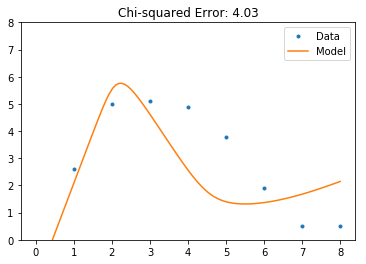

In [73]:
toFit = ['beta','p_h', 'k_h', 'tau', 'delta', 'c', 's', 'alpha', 'ep1','ep2']
k_h = 4 ;
p_h = 4.6E-2 ;
tau = 0.7 ; 
beta = 3.2E-5 ;
delta = 5.2 ;
c = 5.2 ;
s = 1 ;
alpha = 100 ; #unknown
ep1 = 0.001 ; #unknown
ep2 = 0.001 ; #unknown
nParameters = len(toFit)
params = lmfit.Parameters()
params.add('beta', value=beta, min=beta/10.0, max=beta*10.0)
params.add('k_h', value=k_h, min=k_h/10.0, max=k_h*10.0)
params.add('p_h', value=p_h, min=p_h/10.0, max=p_h*10.0)
params.add('c', value=c, min=c/10.0, max=c*10.0)
params.add('delta', value=delta, min=delta/10.0, max=delta*10.0)
params.add('tau', value=tau, min=tau/10.0, max=tau*10.0)
params.add('s', value=s, min=s/10.0, max=s*10.0)
params.add('alpha', value=alpha, min=alpha/10.0, max=alpha*10.0)
params.add('ep1', value=ep1, min=ep1/10.0, max=ep1*10.0)
params.add('ep2', value=ep2, min=ep2/10.0, max=ep2*10.0)
cost_fun(params);

Shown here is the inital guess for the fitting. The Chi-squared error is the sum of the distances that each data point is from the orange line of the model. The lower the value, the less cumulative distance the data is from this line, which represents a better fit. 

In [74]:
bu3 = widgets.ToggleButton(
    value=False,
    description='Fit Parameters',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Description',
    icon='check' # (FontAwesome names without the `fa-` prefix)
)

def runOptimizer2(b):
    if b:
        
        global result
        bu4.disabled = False
        minimizer = lmfit.Minimizer(cost_fun, params,iter_cb = iter_cb)
        result = minimizer.minimize(method='nelder')
        lmfit.report_fit(result.params)
        
interact(runOptimizer2, b = bu3);

interactive(children=(ToggleButton(value=False, description='Fit Parameters', icon='check', tooltip='Description'), Output()), _dom_classes=('widget-interact',))

# Model With Optimized Parameters

The results of this model represent the most accurate fitting of the parameters based on the data provided. 

In [75]:
bu4 = widgets.ToggleButton(
    value=False,
    description='Optimized Model',
    disabled=True,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Description',
    icon='check' # (FontAwesome names without the `fa-` prefix)
)

def fitModel2(b):
    if b:
        m = te.loada(model_Delay)
        for i in range(nParameters):
            m.model[toFit[i]] = result.params[toFit[i]].value
        s = m.simulate(0,8,100,['time','V','T','F','F4'])

        fig, ax1 = plt.subplots()

        ax1.set_xlabel('Time post infection (Days)')
        ax1.set_ylabel('Target Cells')
        plt.plot(s['time'],s['T'],label='T',color='b')
        plt.legend(loc='center right')

        ax2 = ax1.twinx()
        ax2.set_ylabel('Viral Load ($Log_{10} TCID_{50}$) & IFN')
        plt.plot(s['time'],s['V'],label='V',color='g')
        plt.plot(s['time'],s['F4'],label='IFN',color='r')

        plt.legend(loc = 'lower right')

        plt.yscale('log')
        plt.show() 
        
interact(fitModel2, b = bu4);

interactive(children=(ToggleButton(value=False, description='Optimized Model', disabled=True, icon='check', tooltip='Description'), Output()), _dom_classes=('widget-interact',))

# Model With Treatment

This model redefines the previous delay model with the addition of antiviral treatment zanamivir (Hayden et al., 1996). Zanamivir works by inhibiting the neuraminidase enzyme produced by the virus. This results in the virus being unable to escape an infected cell, decreasing the viral production rate.

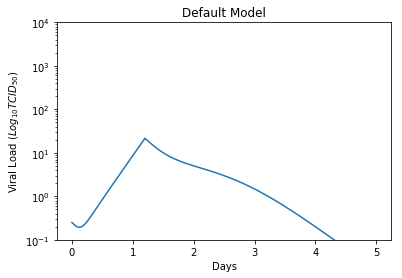

Button(description='Default Values', style=ButtonStyle())

interactive(children=(FloatSlider(value=1.2, continuous_update=False, description='time of treatment (days)', layout=Layout(width='500px'), max=5.0, min=0.02, step=0.02, style=SliderStyle(description_width='initial')), FloatSlider(value=0.97, continuous_update=False, description='effectivity of treatment (%)', layout=Layout(width='500px'), max=1.0, min=0.01, step=0.01, style=SliderStyle(description_width='initial')), Output()), _dom_classes=('widget-interact',))

In [76]:
model_Delay_T = '''

    //Equations
    E1: T -> I1 ; beta*T0*(V/T0)*T ;
    E2: I1 -> I2 ; k*I1 ;
    E3: I2 -> ; delta*I2 ;
    E4: -> V ; p*I2 ;
    E5: V -> ; c*V ;
    E6: -> F; s*I2 ;
    E7: F -> ; alpha*F ;
    E8: -> F0 ; F ;
    
    E9: F0 -> F1 ; tau*F0 ;
    E10: F1 -> F2 ; tau*F1 ;
    E11: F2 -> F3 ; tau*F2 ;
    E12: F3 -> F4 ; tau*F3 ;
    E13: F4 -> ; F4*tau ;
    
    k := (k_h)/(1+ep1*F4) ;
    p := (p_h)/(1+ep2*F4) ;
    
    t = 0 ;
    
    eff = 0.97 ; //97% effectivity of treatment
    
    at (time>t): p_h = p_h*(1-eff) ;
    
    //Parameters
    k_h = 3.2 ;
    p_h = 2.7E-5 ;
    tau = 0.5 ; 
    beta = 1.4E-2 ;
    delta = 3.2 ;
    c = 3.2 ;
    s = 1 ;
    alpha = 100 ; //unknown
    ep1 = 0.001 ; //unknown
    ep2 = 0.001 ; //unknown
    
    //Initial Conditions
    T0 = 4E8 ;
    T = T0 ;
    V0 = 0.25 ;
    V = V0 ;
    I10 = 0 ;
    I1 = I10 ;
    I20 = 0 ;
    I2 = I20 ;


'''    
m = te.loada(model_Delay_T)
m.t = 1.2
m.eff = 0.97

s = m.simulate(0,5,1000, ['time', 'V'])
plt.xlabel('Days')
plt.ylabel('Viral Load ($Log_{10} TCID_{50}$)')
plt.ylim(10**-1,10**4)
plt.plot(s['time'], s['V'])
plt.yscale('log')
plt.title('Default Model')
plt.show()

button = widgets.Button(description="Default Values")
display(button)

def on_button_clicked(b):
    
    clear_output(wait=True)
    
    m = te.loada(model_Delay_T)
    m.t = 1.2
    m.eff = 0.97

    s = m.simulate(0,5,1000, ['time', 'V'])
    plt.xlabel('Days')
    plt.ylabel('Viral Load ($Log_{10} TCID_{50}$)')
    plt.ylim(10**-1,10**4)
    plt.plot(s['time'], s['V'])
    plt.yscale('log')
    plt.title('Default Model')
    plt.show()
    
    button = widgets.Button(description="Default Values")
    display(button)
    style = {'description_width': 'initial'}
    layout=widgets.Layout(width='500px')

    t1 = FloatSlider(min = 0.02, max = 5.0, step = 0.02, value = 1.2,continuous_update=False,style=style,layout=layout, description='time of treatment (days)')
    e1 = FloatSlider(min = 0.01, max = 1.0 , step = 0.01, value = 0.97, continuous_update=False,style=style,layout=layout, description='effectivity of treatment (%)')

    interact(replotTreatment, t = t1,e = e1);
    
    button.on_click(on_button_clicked)
    
button.on_click(on_button_clicked)

def replotTreatment(t, e):
    m = te.loada(model_Delay_T)
    m.t = t
    m.eff = e
    s = m.simulate(0,5,1000, ['time', 'V'])
    plt.xlabel('Days')
    plt.ylabel('Viral Load ($Log_{10} TCID_{50}$)')
    plt.ylim(10**-1,10**4)
    plt.plot(s['time'], s['V'])
    plt.yscale('log')

    plt.show()
    print('time of treatment (t):         ',m.t,'days')
    print('effectivity of treatment (e):  ',m.eff,'%')

style = {'description_width': 'initial'}
layout=widgets.Layout(width='500px')

t1 = FloatSlider(min = 0.02, max = 5.0, step = 0.02, value = 1.2,continuous_update=False,style=style,layout=layout, description='time of treatment (days)')
e1 = FloatSlider(min = 0.01, max = 1.0 , step = 0.01, value = 0.97, continuous_update=False,style=style,layout=layout, description='effectivity of treatment (%)')
    
interact(replotTreatment, t = t1,e = e1);


## Try:

Compare the results for treatment at 1.2 days and treatment at 2.08 days. Notice how earlier treatment results in an overall lower viral load peak as well as a shorter duration of infection.

Experiment with the effectivity of treatment (e) and see how the shape of the curve changes.

Data for this treatment model provided from: 

Baccam, P., Beauchemin, C., Macken, C.A., Hayden, F.G., Perelson, A.S. “Kinetics of Influenza A Virus Infection in Humans.” Journal of Virology, American Society for Microbiology Journals, 1 Aug. 2006. p. 7590–7599. Copyright © 2006, American Society for Microbiology. Figure 3. jvi.asm.org/content/80/15/7590.short. 

Hayden, F. G., J. J. Treanor, R. F. Betts, M. Lobo, J. D. Esinhart, and E. K. Hussey. 1996. Safety and efficacy of the neuraminidase inhibitor GG167 in experimental human influenza. JAMA 275:295–299.

# Specifying Immune Response

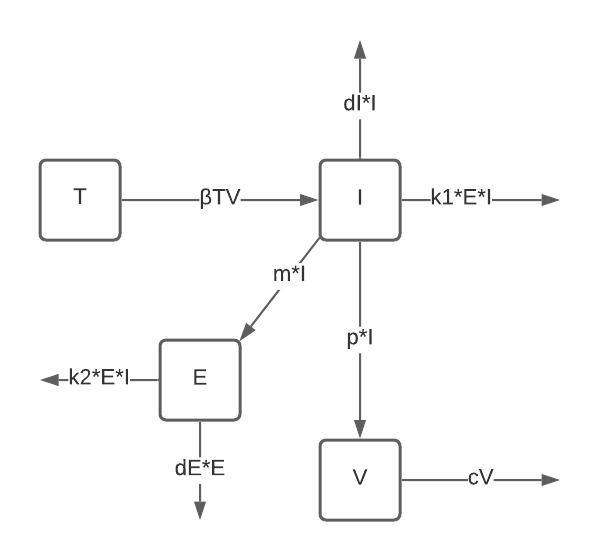


$\frac{dT}{dt}=-\beta T V$ 

$\frac{dI}{dt}=\beta T V - k_1 E I - d_I I$ 

$\frac{dV}{dt}=p I - c V$ 

$\frac{dE}{dt}=m I - k_2 E I - d_E E$ 

The previous models incorperated an implied immune response through the use of $\delta$, representing infected cell death rate per day, but did not specify the means by which this is accomoplished. This model attempts to better specify the mechanisms of the immune system by considering the effects of effector cells ($E$) by using the simplified model without delay, and adding the effects of effector cells. The purpose of effector cells is to attack and kill infected cells, with each individual effector cell being able to kill about 100 infected cells in its lifetime (Table 2 (Hancioglu et al., 2006)). Effector cells are produced by antigen presenting cells (APC) which are stimulated by the presence of infected cells and virions (Hancioglu et al., 2006). This model considers the infected cells as the main stimulus of the production of effector cells.

In reality, APC stimulate the secretion of interferon as one of the first responses to infection. Interferon is responsible for converting cells into an infection-resistant state, slowing the spead of infection. This process buys the immune response enough time to produce effetor cells. This model, however, does not accurately portray this. Production of effector cells should occur after the production of interferon. Additionally, the estimated lifetime of effector cells is approximately two weeks (Nayar, Sandeep et al., 2015) and the lifetime of an infected cell is about one day (Hancioglu et al., 2006). 

New parameters are introduced: $k1, k2, d, m,$ and $nkill$. $k1$ represents the rate at which effector cells kill infected cells per day. $k2$ represents the rate at which effector cells are killed due to killing infected cells. Since effector cells are able to kill 100 infected cells before dying, $k2$ is 100 times smaller than $k1$. The parameter $d$ represents the natural death rate of $I$ and $E$ cells per day. The parameter $m$ represents the rate of production of $E$ cells due to the presence of infected cells. The parameter $nkill$ represents the estimated number of infected cells an effector cell is able to kill in its lifetime.

## Try:

##### Note: for each exercise below, change the length of the simulation (simLen) if there is difficulty interpreting results

1. Try increasing and decreasing the value of $nkill$ and see how the results change. Notice that by increasing the value, the duration of the infection increases, while the total viral load and infected cell count decrease.


2. Adjust the viral clearance rate $c$ to 0.3. How does this result differ from the initial value of 1.5? Increasing the clearance rate of free virus not only decreases the viral load, but also results in a slower infection as there are less virions available to infect target cells. 


3. Gradually increase the value of $k1$ and see how the graph changes. You should see a slower progression of infection as well as a decrease in $E$ cells. Since effector cells are killed either due to lifespan time limit or by killing the number of infected cells equal to the value of $nkill$,  increasing the rate at which effector cells kill infected cells means this maximum kill limit ($nkill$) will be reached faster, shortening this lifespan.


4. Experiment by adjusting the death rate ($dR$) of effector and infected cells. You should see that by increasing the death rate that the final values of effector cells and infected cells is decreased. Decreasing the death rate will increase these final values. Notice that the death rate value has little to no influence on the infected cell or the effector cell curve prior to their peaks.

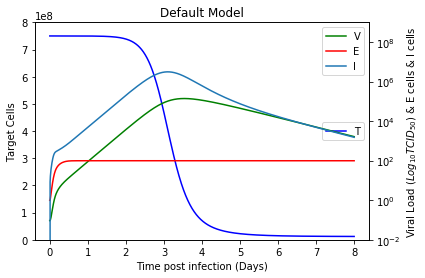

Button(description='Default Values', style=ButtonStyle())

interactive(children=(FloatSlider(value=100.0, continuous_update=False, description='Number of I cells killed per E cell', layout=Layout(width='500px'), max=500.0, min=10.0, readout_format='.2e', step=10.0, style=SliderStyle(description_width='initial')), FloatSlider(value=1.2, continuous_update=False, description='Natural viral decay rate', layout=Layout(width='500px'), max=4.0, min=0.1, readout_format='.2e', style=SliderStyle(description_width='initial')), FloatSlider(value=2.0, continuous_update=False, description='Death rate of I cells due to E cells', layout=Layout(width='500px'), max=10.0, min=1.0, readout_format='.2e', step=1.0, style=SliderStyle(description_width='initial')), FloatSlider(value=8.0, continuous_update=False, description='Length of simulation', layout=Layout(width='500px'), max=35.0, min=1.0, readout_format='.2e', step=1.0, style=SliderStyle(description_width='initial')), FloatSlider(value=0.07, continuous_update=False, description='Natural death rate of E cells', layout=Layout(width='500px'), max=1.0, readout_format='.2e', step=0.01, style=SliderStyle(description_width='initial')), FloatSlider(value=1.0, continuous_update=False, description='Natural death rate of I cells', layout=Layout(width='500px'), max=24.0, readout_format='.2e', step=1.0, style=SliderStyle(description_width='initial')), Output()), _dom_classes=('widget-interact',))

In [77]:
model_IR = '''

    //Equations
    E1: T -> I ; beta*T*V ;
    E2: I -> ; k1*E*I ;
    E3: -> V ; p*I ;
    E4: V -> ; c*V ;
    E5: -> E ; m*I ;
    E6: E -> ; k2*E*I ;    
    E7: E -> ; de*E ;
    E8: I -> ; dI*I ;
    
    //Parameters
    
    p = 9E-2 ;    //4.6E-2 original
    beta = 1.5E-5 ; //2.7E-5 original
    k1 = 2 ;          // old delta => new death rate of infected cells due to effector cells
    nkill = 100 ;    //typical amount of cells each E cell kills before dying
    k2 := k1/nkill ;        // clearance rate of effector cells
    c = 1.2 ;         // natural viral decay  
    m = 2 ;          // rate of production of effector cells
    //d = 3;           //death rate of E cells and I cells (natural)
    
    de = .07;           //death rate of E cells (natural)
    dI = 1;              //death rate of I cells (natural)
    
    //Initial Conditions
    T0 = 7.5E8 ; //4E8 original
    T = T0 ;
    V0 = 9.3E-2 ;
    V = V0 ;
    I0 = 0 ;
    I = I0 ;
    E0 = 1;
    E = E0 ;
    
    R0 := (p*beta*T0)/((k1*E + de + dI)*c)
    

'''
m = te.loada(model_IR)

s = m.simulate(0,8,1000,['time','V','T','E','I'])

fig, ax1 = plt.subplots()

ax1.set_xlabel('Time post infection (Days)')
ax1.set_ylabel('Target Cells')
plt.ylim(0,8E8)
plt.plot(s['time'],s['T'],label='T',color='b')
plt.legend(loc='center right')

ax2 = ax1.twinx()
ax2.set_ylabel('Viral Load ($Log_{10} TCID_{50}$) & E cells & I cells')
plt.plot(s['time'],s['V'],label='V',color='g')
plt.plot(s['time'],s['E'],label='E',color='r')
plt.plot(s['time'],s['I'],label='I')
plt.legend(loc='upper right')

plt.yscale('log')
plt.title('Default Model')
plt.ylim(10**-2,10**9)
plt.show() 

button = widgets.Button(description="Default Values")
display(button)

def on_button_clicked(b):
    
    clear_output(wait=True)
    
    m = te.loada(model_IR)

    s = m.simulate(0,8,1000,['time','V','T','E','I'])

    fig, ax1 = plt.subplots()

    ax1.set_xlabel('Time post infection (Days)')
    ax1.set_ylabel('Target Cells')
    plt.ylim(0,8E8)
    plt.plot(s['time'],s['T'],label='T',color='b')
    plt.legend(loc='center right')

    ax2 = ax1.twinx()
    ax2.set_ylabel('Viral Load ($Log_{10} TCID_{50}$) & E cells & I cells')
    plt.plot(s['time'],s['V'],label='V',color='g')
    plt.plot(s['time'],s['E'],label='E',color='r')
    plt.plot(s['time'],s['I'],label='I')
    plt.legend(loc='upper right')

    plt.yscale('log')
    plt.title('Default Model')
    plt.ylim(10**-2,10**9)
    plt.show() 
    
    button = widgets.Button(description="Default Values")
    display(button)

    style = {'description_width': 'initial'}
    layout=widgets.Layout(width='500px')

    dI1 = FloatSlider(min=0,max=24,step=1,value=1,continuous_update=False,layout=layout,style=style,readout_format='.2e',description='Natural death rate of I cells')
    de1 = FloatSlider(min=0.0,max=1.0,step=.01,value=0.07,continuous_update=False,layout=layout,style=style,readout_format='.2e',description='Natural death rate of E cells')
    nkill_1 = FloatSlider(min=10,max=500,step=10,value=100,continuous_update=False,layout=layout,style=style,readout_format='.2e',description='Number of I cells killed per E cell')
    c3 = FloatSlider(min=0.1,max=4,step=0.1,value=1.2,continuous_update=False,layout=layout,style=style,readout_format='.2e',description='Natural viral decay rate')
    k3 = FloatSlider(min=1,max=10,step=1,value=2,continuous_update=False,layout=layout,style=style,readout_format='.2e',description='Death rate of I cells due to E cells')
    simLen = FloatSlider(min=1,max=35,step=1,value=8,continuous_update=False,layout=layout,style=style,readout_format='.2e',description='Length of simulation')


    interact(replot3, de=de1,dI=dI1 , nkill=nkill_1, c=c3,k1=k3,simLen=simLen);
    
    button.on_click(on_button_clicked)
    
button.on_click(on_button_clicked)


def replot3(nkill,c,k1,simLen,de,dI):

    m = te.loada(model_IR)
    
    d = simLen
    m.dI = dI
    m.de = de
    m.nkill = nkill
    m.c= c
    m.k1 = k1
    
    s = m.simulate(0,d,1000,['time','V','T','E','I'])

    fig, ax1 = plt.subplots()

    ax1.set_xlabel('Time post infection (Days)')
    ax1.set_ylabel('Target Cells')
    plt.ylim(0,8E8)
    plt.plot(s['time'],s['T'],label='T',color='b')
    plt.legend(loc='center right')

    ax2 = ax1.twinx()
    ax2.set_ylabel('Viral Load ($Log_{10} TCID_{50}$) & E cells & I cells')
    plt.plot(s['time'],s['V'],label='V',color='g')
    plt.plot(s['time'],s['E'],label='E',color='r')
    plt.plot(s['time'],s['I'],label='I')
    plt.legend(loc='upper right')

    plt.yscale('log')
    plt.ylim(10**-2,10**9)
    plt.show() 
    
    print('**Note** Viral load, E cell count, and I cell count are in log scale')
    print('')
    print('')
    print('Number of I cells killed per E cell (nkill):  ',m.nkill,'cells')
    print('Natural viral decay rate (c):                 ',m.c,'1/d')
    print('Death rate of I cells due to E cells (k1):    ',m.k1,'1/d')
    print('Natural death rate of E cells (de):           ',m.de,'1/d')
    print('Natural death rate of I cells (dI):           ',m.dI,'1/d')
    print('Length of simulation (simLen):                ',d,'days')
    print('')
    print('R0:',m.R0)

style = {'description_width': 'initial'}
layout=widgets.Layout(width='500px')
    
dI1 = FloatSlider(min=0,max=24,step=1,value=1,continuous_update=False,layout=layout,style=style,readout_format='.2e',description='Natural death rate of I cells')
de1 = FloatSlider(min=0.0,max=1.0,step=.01,value=0.07,continuous_update=False,layout=layout,style=style,readout_format='.2e',description='Natural death rate of E cells')
nkill_1 = FloatSlider(min=10,max=500,step=10,value=100,continuous_update=False,layout=layout,style=style,readout_format='.2e',description='Number of I cells killed per E cell')
c3 = FloatSlider(min=0.1,max=4,step=0.1,value=1.2,continuous_update=False,layout=layout,style=style,readout_format='.2e',description='Natural viral decay rate')
k3 = FloatSlider(min=1,max=10,step=1,value=2,continuous_update=False,layout=layout,style=style,readout_format='.2e',description='Death rate of I cells due to E cells')
simLen = FloatSlider(min=1,max=35,step=1,value=8,continuous_update=False,layout=layout,style=style,readout_format='.2e',description='Length of simulation')
    
    
interact(replot3, de=de1,dI=dI1 , nkill=nkill_1, c=c3,k1=k3,simLen=simLen);


Data for this model provided from:

Baccam, P., Beauchemin, C., Macken, C.A., Hayden, F.G., Perelson, A.S. “Kinetics of Influenza A Virus Infection in Humans.” Journal of Virology, American Society for Microbiology Journals, 1 Aug. 2006. p. 7590–7599. Copyright © 2006, American Society for Microbiology. jvi.asm.org/content/80/15/7590.short. 


Hancioglu, B, Swigon, D, Clermont, G. “A Dynamical Model of Human Immune Response to Influenza A Virus Infection.” Journal of Theoretical Biology, Academic Press, 19 Dec. 2006. Copyright © 2007, Elsevier Ltd. www.sciencedirect.com/science/article/pii/S0022519306005820?casa_token=xSbQ0gmMvBoAAAAA%3AQvT4aCoj39MdfGypwyGhgfpbmk8FVwslrXnECsb05teHijHFCqBtE8D2prmG2KmCnNceG1pl. 

# References


(1)
Baccam, P., Beauchemin, C., Macken, C.A., Hayden, F.G., Perelson, A.S. “Kinetics of Influenza A Virus Infection in Humans.” Journal of Virology, American Society for Microbiology Journals, 1 Aug. 2006. p. 7590–7599. Copyright © 2006, American Society for Microbiology. jvi.asm.org/content/80/15/7590.short. 

(2)
Hancioglu, B, Swigon, D, Clermont, G. “A Dynamical Model of Human Immune Response to Influenza A Virus Infection.” Journal of Theoretical Biology, Academic Press, 19 Dec. 2006. Copyright © 2007, Elsevier Ltd. www.sciencedirect.com/science/article/pii/S0022519306005820?casa_token=xSbQ0gmMvBoAAAAA%3AQvT4aCoj39MdfGypwyGhgfpbmk8FVwslrXnECsb05teHijHFCqBtE8D2prmG2KmCnNceG1pl. 

(3)
Murphy, Brian R., et al. “Evaluation of Influenza A/Hong Kong/123/77 (H1N1) Ts-1A2 and Cold-Adapted Recombinant Viruses in Seronegative Adult Volunteers.” Infection and Immunity, American Society for Microbiology Journals, 1 Aug. 1980. p. 348-355. iai.asm.org/content/29/2/348.short. 

(4)
Hayden, F. G., J. J. Treanor, R. F. Betts, M. Lobo, J. D. Esinhart, and E. K. Hussey. 1996. Safety and efficacy of the neuraminidase inhibitor GG167 in experimental human influenza. JAMA 275:295–299.

(5)
Diebold, S. S., T. Kaisho, H. Hemmi, S. Akira, and C. Reis e Sousa. 2004. Innate antiviral responses by means of TLR7-mediated recognition of singlestranded RNA. Science 303:1529–1531.

(6)
Julkunen, I., K. Melen, M. Nyqvist, J. Pirhonen, T. Sareneva, and S. Matikainen. 2000. Inflammatory responses in influenza A virus infection. Vaccine 19(Suppl. 1):S32–S37.

(7)
Akira, S., Takeda, K., Kaisho, T., 2001. Toll-like receptors: critical proteins linking innate and acquired immunity. Nat. Immunol. 2, 675–680.

(8)
Nayar, Sandeep et al. “Extending the lifespan and efficacies of immune cells used in adoptive transfer for cancer immunotherapies-A review.” Oncoimmunology vol. 4,4 e1002720. 19 Mar. 2015, doi:10.1080/2162402X.2014.1002720